In [1]:
import csv
import nltk
import sklearn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import mean, absolute, sqrt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from nltk.corpus import wordnet as wn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# Import datasets

class Dataset(object):

    def __init__(self):
        self.trainset = self.read_dataset("train_full.txt")
        self.testset = self.read_dataset("test.txt")

    def read_dataset(self, file_path):
        with open(file_path, encoding="UTF-8") as file:
            fieldnames = ['ID', 'sentence', 'start_index', 'end_index', 'target_word', 'native_annots',
                          'nonnative_annots', 'native_complex', 'nonnative_complex', 'gold_label']
            reader = csv.DictReader(file, fieldnames=fieldnames, delimiter='\t')

            dataset = [sent for sent in reader]

        return dataset

In [3]:
# Print the length of the two datasets

data = Dataset()
print("{} training - {} test".format(len(data.trainset), len(data.testset)))

14002 training - 1764 test


In [4]:
# Features extraction

avg_word_length = 5.3
def extract_features(word):
        len_chars = len(word) / avg_word_length
        len_tokens = len(word.split(' '))
        pos = 0
        means = 0
        for wor in word.split(' '):
            s = [w.pos() for w in wn.synsets(word)]
            pos+=len(set(s))
            means+=len(s)
        #print([len_chars, len_tokens,pos/2,means/10])
        return [len_chars, len_tokens,pos/2,means/10]

train_X = []
train_y = []
dev_X = []
dev_y = []

for sent in data.trainset[:int(len(data.trainset)*0.8)+1]:
    train_X.append(extract_features(sent['target_word']))
    train_y.append(sent['gold_label'])

for sent in data.trainset[int(len(data.trainset)*0.8)+1:]:
    dev_X.append(extract_features(sent['target_word']))
    dev_y.append(sent['gold_label'])

test_X = []
test_Y = []

for sent in data.testset:
    test_X.append(extract_features(sent['target_word']))
    test_Y.append(sent['gold_label'])

In [5]:
# Create Simple Linear Regression object
line_regr = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=True)

# Train the model using the training sets
line_regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = line_regr.predict(dev_X)

# The coefficients
print("Coefficients: \n", line_regr.coef_)
# The mean squared error
print("Mean squared error: %.15f" % mean_squared_error(dev_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.15f" % r2_score(dev_y, pred_y))
# The mean absolute error
print("Mean absolute error: %.15f" % mean_absolute_error(dev_y, pred_y))

Coefficients: 
 [0.02981521 0.         0.0004925  0.        ]
Mean squared error: 0.032985444974885
Coefficient of determination: 0.024454802836227
Mean absolute error: 0.114034718159207


C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

In [6]:
# Predict the test_Y values (The word complexity estimation of the test file)

test_Y = line_regr.predict(dev_X)
print(test_Y)

[0.07430023 0.06892097 0.10242779 ... 0.080172   0.07454648 0.06403422]


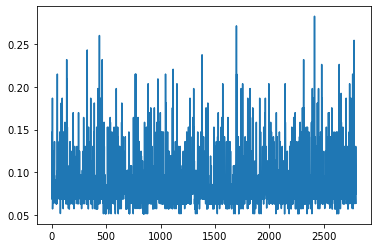

In [7]:
plt.plot(test_Y)

In [8]:
# Create data frame containes test_Y results 
datatest = pd.read_csv("test.csv")
Xtest = datatest.iloc[:, 0].values
new_data = [[Xtest[:], test_Y[:]]]
# Create the pandas DataFrame
df = pd.DataFrame(new_data, columns = [['ID','Label']])  
# print dataframe.
df

,ID,Label
0,"[14003, 14004, 14005, 14006, 14007, 14008, 140...","[0.07430023316391896, 0.0689209733316018, 0.10..."


In [9]:
# Save the results in the submission file

sub_file = pd.read_csv('submission.csv')
sub_file
label_result=pd.DataFrame(sub_file)
label_result['Label']=pd.Series(test_Y)
sub_file
label_result.to_csv('LinearRegression.csv')

In [10]:
# Create Support Vector Regression object
svr_regr = SVR(kernel = 'rbf', epsilon = 0.0005, gamma=500.0)

# Train the model using the training sets
svr_regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = svr_regr.predict(dev_X)

# The mean squared error
print("Mean squared error: %.15f" % mean_squared_error(dev_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.15f" % r2_score(dev_y, pred_y))
# The mean absolute error
print("Mean absolute error: %.15f" % mean_absolute_error(dev_y, pred_y))

Mean squared error: 0.031460897774998
Coefficient of determination: 0.069543316871184
Mean absolute error: 0.077516271892923


C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

In [11]:
test_Y = svr_regr.predict(dev_X)
print(test_Y)

[0.00066895 0.0010499  0.00066321 ... 0.00024199 0.00061503 0.00011056]


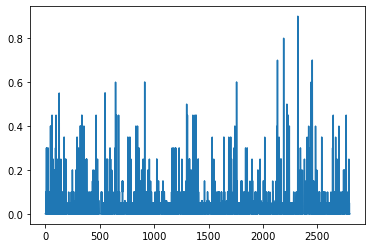

In [12]:
plt.plot(test_Y)

In [13]:
datatest = pd.read_csv("test.csv")
Xtest = datatest.iloc[:, 0].values
new_data = [[Xtest[:], test_Y[:]]] 
# Create the pandas DataFrame
df = pd.DataFrame(new_data, columns = [['ID','Label']])  
# print dataframe.
df

,ID,Label
0,"[14003, 14004, 14005, 14006, 14007, 14008, 140...","[0.0006689533011485227, 0.001049904502472776, ..."


In [14]:
# Save the results in the submission file

sub_file = pd.read_csv('submission.csv')
sub_file
label_result=pd.DataFrame(sub_file)
label_result['Label']=pd.Series(test_Y)
sub_file
label_result.to_csv('SupportVectorRegression.csv')

In [15]:
# Creat Decision Tree Regression object
dtr_regr = DecisionTreeRegressor(ccp_alpha=0.000001, random_state=100,
                                 min_samples_leaf=40,min_samples_split=10,
                                 splitter='best' 
                                )

# Train the model using the training sets
dtr_regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = dtr_regr.predict(dev_X)

# The mean squared error
print("Mean squared error: %.15f" % mean_squared_error(dev_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.15f" % r2_score(dev_y, pred_y))
# The mean absolute error
print("Mean absolute error: %.15f" % mean_absolute_error(dev_y, pred_y))

Mean squared error: 0.027107628319728
Coefficient of determination: 0.198291348382718
Mean absolute error: 0.096512221993151


C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

In [16]:
test_Y = dtr_regr.predict(dev_X)
print(test_Y)

[0.01470588 0.00584958 0.16104651 ... 0.11769912 0.02902299 0.00584958]


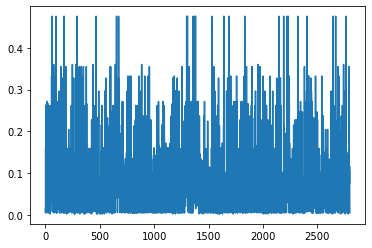

In [17]:
plt.plot(test_Y)

In [18]:
datatest = pd.read_csv("test.csv")
Xtest = datatest.iloc[:, 0].values
new_data = [[Xtest[:], test_Y[:]]] 
# Create the pandas DataFrame
df = pd.DataFrame(new_data, columns = [['ID','Label']])  
# print dataframe.
df

,ID,Label
0,"[14003, 14004, 14005, 14006, 14007, 14008, 140...","[0.01470588235294118, 0.005849582172701943, 0...."


In [19]:
# Save the results in the submission file

sub_file = pd.read_csv('submission.csv')
sub_file
label_result=pd.DataFrame(sub_file)
label_result['Label']=pd.Series(test_Y)
sub_file
label_result.to_csv('DecisionTreeRegression.csv')

In [20]:
# Create Random Forest Regression model object
rf_regr = RandomForestRegressor(n_estimators = 7000, random_state = 1000)

# Train the model using the training sets
rf_regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = rf_regr.predict(dev_X)

# The mean squared error
print("Mean squared error: %.15f" % mean_squared_error(dev_y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.15f" % r2_score(dev_y, pred_y))
# The mean absolute error
print("Mean absolute error: %.15f" % mean_absolute_error(dev_y, pred_y))

Mean squared error: 0.026863758042149
Coefficient of determination: 0.205503816736687
Mean absolute error: 0.094013194265304


C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Lara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

In [21]:
test_Y = rf_regr.predict(dev_X)
print(test_Y)

[0.00570309 0.01246955 0.16056757 ... 0.11583532 0.01210848 0.00150901]


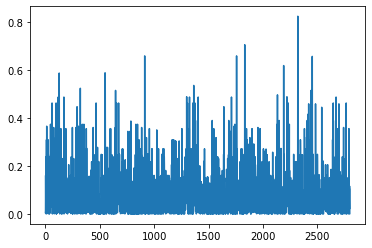

In [22]:
plt.plot(test_Y)

In [23]:
datatest = pd.read_csv("test.csv")
Xtest = datatest.iloc[:, 0].values
new_data = [[Xtest[:], test_Y[:]]] 
# Create the pandas DataFrame
df = pd.DataFrame(new_data, columns = [['ID','Label']])  
# print dataframe.
df

,ID,Label
0,"[14003, 14004, 14005, 14006, 14007, 14008, 140...","[0.005703085913838451, 0.012469553706585335, 0..."


In [24]:
# Save the results in the submission file

sub_file = pd.read_csv('submission.csv')
sub_file
label_result=pd.DataFrame(sub_file)
label_result['Label']=pd.Series(test_Y)
sub_file
label_result.to_csv('RandomForestRegression.csv')

In [25]:
# Define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Use k-fold CV to evaluate model
scores = cross_val_score(line_regr, train_X, train_y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# View mean absolute error (MAE)
print("Mean Absolute Error is :  ", mean(absolute(scores)))

# View root mean squared error (RMSE)
# print("Root Mean Squared Error is :  ", sqrt(mean(absolute(scores))))

Mean Absolute Error is :   0.1124648496658908


In [26]:
# Define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Use k-fold CV to evaluate model
scores = cross_val_score(svr_regr, train_X, train_y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# View mean absolute error (MAE)
print("Mean Absolute Error is :  ", mean(absolute(scores)))

# View root mean squared error (RMSE)
# print("Root Mean Squared Error is :  ", sqrt(mean(absolute(scores))))

Mean Absolute Error is :   0.076240738170416


In [27]:
# Define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Use k-fold CV to evaluate model
scores = cross_val_score(dtr_regr, train_X, train_y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# View mean absolute error (MAE)
print("Mean Absolute Error is :  ", mean(absolute(scores)))

# View root mean squared error (RMSE)
# print("Root Mean Squared Error is :  ", sqrt(mean(absolute(scores))))

Mean Absolute Error is :   0.09424268189589007


In [28]:
# Define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Use k-fold CV to evaluate model
scores = cross_val_score(rf_regr, train_X, train_y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# View mean absolute error (MAE)
print("Mean Absolute Error is :  ", mean(absolute(scores)))

# View root mean squared error (RMSE)
# print("Root Mean Squared Error is :  ", sqrt(mean(absolute(scores))))

Mean Absolute Error is :   0.09166594917062786
